<a href="https://colab.research.google.com/github/ArrogantNobody/Pytorch_study/blob/main/pytorch_foundation_data_batch_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])


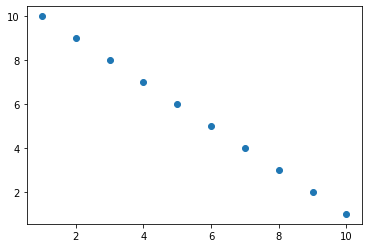

In [4]:
BATCH_SIZE = 5

x = torch.linspace(1,10,10)#step number
print(x)
y = torch.linspace(10,1,10)
print(y)
plt.scatter(x,y)
plt.show()

classtorch.utils.data.Dataset表示Dataset的抽象类。[1]
所有其他数据集都应该进行子类化。所有子类应该override__len__和__getitem__，前者提供了数据集的大小，后者支持整数索引，范围从0到len(self)。

class torch.utils.data.TensorDataset(data_tensor, target_tensor)

包装数据和目标张量的数据集。

通过沿着第一个维度索引两个张量来恢复每个样本。

参数：

data_tensor (Tensor) －　包含样本数据
target_tensor (Tensor) －　包含样本目标（标签）


classtorch.utils.data.DataLoader数据加载器。组合数据集和采样器，并在数据集上提供单进程或多进程迭代器。[2]
参数：

dataset (Dataset) – 加载数据的数据集。
batch_size (int, optional) – 每个batch加载多少个样本(默认: 1)。
**shuffle (bool, optional) – 设置为True时会在每个epoch重新打乱数据(默认: False).**
sampler (Sampler, optional) – 定义从数据集中提取样本的策略。如果指定，则忽略shuffle参数。
num_workers (int, optional) – 用多少个子进程加载数据。0表示数据将在主进程中加载(默认: 0)
collate_fn (callable, optional) –
pin_memory (bool, optional) –
drop_last (bool, optional) – 如果数据集大小不能被batch size整除，则设置为True后可删除最后一个不完整的batch。如果设为False并且数据集的大小不能被batch size整除，则最后一个batch将更小。(默认: False)

In [10]:
torch_dataset = Data.TensorDataset(x , y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

step = iteration = (dataset/batchSize) * epoch

In [11]:
for epoch in range(3):
    for step ,(batch_x,batch_y) in enumerate(loader):
        print('Epoch:',epoch,'| step:',step,'|batch_x:',batch_x.numpy(),'|batch_y：',batch_y.numpy())

Epoch: 0 | step: 0 |batch_x: [2. 8. 1. 5. 3.] |batch_y： [ 9.  3. 10.  6.  8.]
Epoch: 0 | step: 1 |batch_x: [10.  7.  4.  9.  6.] |batch_y： [1. 4. 7. 2. 5.]
Epoch: 1 | step: 0 |batch_x: [1. 3. 8. 9. 7.] |batch_y： [10.  8.  3.  2.  4.]
Epoch: 1 | step: 1 |batch_x: [ 5.  6. 10.  4.  2.] |batch_y： [6. 5. 1. 7. 9.]
Epoch: 2 | step: 0 |batch_x: [10.  9.  6.  4.  1.] |batch_y： [ 1.  2.  5.  7. 10.]
Epoch: 2 | step: 1 |batch_x: [3. 2. 8. 7. 5.] |batch_y： [8. 9. 3. 4. 6.]


pro part

transform=torchvision.transforms.ToTensor()起到的作用是把PIL.Image或者numpy.narray数据类型转变为torch.FloatTensor类型，shape是C*H*W，数值范围缩小为[0.0, 1.0]。

In [14]:
import torch
import torchvision
# 将数据集合下载到指定目录下
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
from torch.utils.data import DataLoader
print(len(train_dataset))
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=500,
                          shuffle=True)
num_epochs = 2  # 迭代次数
total_step = len(train_dataset)/500

60000


In [17]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # 这里可以放具体的模型训练
        # 每 10 个批次展示一次
        if (i+1) % 10 == 0:
            print('Epoch: {}/{},Step {}/{}| Inputs {} | Labels {}'.format(epoch+1, num_epochs, i+1, total_step, inputs.shape, labels.shape))

Epoch: 1/2,Step 10/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 20/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 30/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 40/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 50/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 60/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 70/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 80/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 90/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 100/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 110/120.0| Inputs torch.Size([500, 1, 28, 28]) | Labels torch.Size([500])
Epoch: 1/2,Step 120

In [18]:
import os
import pandas as pd
os.chdir("/content/drive/MyDrive/pytorch study")

In [41]:
wine = pd.read_csv("./data/wine.csv",header = None)
wine.values#除去标题的纯数据
wine.values[:, 1:]#所有行除了第一列的所有内容
#wine.values[:, 0]#所有行第一列
# label = torch.from_numpy(wine.values[:, 0].reshape(-1,1))
# label.shape

array([['Alcohol', 'Malic.acid', 'Ash', ..., 'Hue', 'OD', 'Proline'],
       ['14.23', '1.71', '2.43', ..., '1.04', '3.92', '1065'],
       ['13.2', '1.78', '2.14', ..., '1.05', '3.4', '1050'],
       ...,
       ['13.27', '4.28', '2.26', ..., '.59', '1.56', '835'],
       ['13.17', '2.59', '2.37', ..., '.6', '1.62', '840'],
       ['14.13', '4.1', '2.74', ..., '.61', '1.6', '560']], dtype=object)

In [42]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class WineDataset(Dataset):
    # 建立一个数据集合继承  Dataset 即可
    def __init__(self):
        # I初始化数据
        # 以pandas的形式读入数据
        winedata = pd.read_csv("./data/wine.csv") # 读取数据
        self.n_samples = winedata.shape[0] # 数据集大小
        # 将 pandas 类型的数据转换成 numpy 类型
        # size [n_samples, n_features]
        self.x_data = torch.from_numpy(winedata.values[:, 1:]) # 特征数据
        self.y_data = torch.from_numpy(winedata.values[:, 0].reshape(-1,1))  # size [n_samples, 1]
    # 返回 dataset[index]
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    # 返回数据长度
    def __len__(self):
        return self.n_samples

In [49]:
dataset = WineDataset()
dataset[0] # 查看样例数据

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03], dtype=torch.float64), tensor([1.], dtype=torch.float64))

In [50]:
# 放入DataLoader
import math
# 传入加载器
train_loader = DataLoader(dataset=dataset, 
                          batch_size=4, 
                          shuffle=True)


num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) # 
print("该数据集合共有{}条数据，被分成了{}个批次".format(total_samples, n_iterations))

该数据集合共有178条数据，被分成了45个批次


In [51]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # 模型训练步骤
        # 178 个样本, batch_size = 4, n_iters=178/4=44.5 -> 45 个批次
        if (i+1) % 5 == 0:
            print('Epoch: {}/{},Step {}/{}| Inputs {} | Labels {}'.format(epoch+1, num_epochs, i+1, n_iterations, inputs.shape, labels.shape))

Epoch: 1/2,Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2,Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2,Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2,Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2,Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2,Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.S

对于一些特征类的数据, 可以一下全部读取内容, 就不需要重写Dataset类, 可以直接使用Data.TensorDataset来进行数据的导入. 例如上面的csv文件, 我们就不需要麻烦的重写Dataset类, 只需要使用TensorDataset即可.

In [52]:
winedata = pd.read_csv("./data/wine.csv")

x_data = torch.from_numpy(winedata.values[:, 1:]) # 特征数据
y_data = torch.from_numpy(winedata.values[:, 0].reshape(-1,1))  # size [n_samples, 1]

print(x_data.shape, y_data.shape)

torch.Size([178, 13]) torch.Size([178, 1])


In [53]:
dataset = torch.utils.data.TensorDataset(x_data, y_data) # 合并训练数据和目标数据
dataset[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03], dtype=torch.float64), tensor([1.], dtype=torch.float64))

In [54]:
MINIBATCH_SIZE = 30
train_loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=MINIBATCH_SIZE,
    shuffle=True,
    num_workers=1           # set multi-work num read data
)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) # 
print("该数据集合共有{}条数据，被分成了{}个批次".format(total_samples, n_iterations))
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # 模型训练步骤
        # 178 个样本, batch_size = 4, n_iters=178/4=44.5 -> 45 个批次
        if (i+1) % 5 == 0:
            print('Epoch: {}/{},Step {}/{}| Inputs {} | Labels {}'.format(epoch+1, num_epochs, i+1, n_iterations, inputs.shape, labels.shape))

该数据集合共有178条数据，被分成了45个批次
Epoch: 1/2,Step 5/45| Inputs torch.Size([30, 13]) | Labels torch.Size([30, 1])
Epoch: 2/2,Step 5/45| Inputs torch.Size([30, 13]) | Labels torch.Size([30, 1])
